In [2]:
# Implementing Feedforward neural networks with Keras and TensorFlow
# a. Import the necessary packages
# b. Load the training and testing data (MNIST/CIFAR10)
# c. Define the network architecture using Keras
# d. Train the model using SGD
# e. Evaluate the network
# f. Plot the training loss and accuracy

In [3]:

# a. Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import seaborn as sns
import keras


In [4]:
# b. Load the training and testing data (MNIST/CIFAR10)
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(f"data type of x_train_full:{X_train_full.dtype},\n shape of X_train_full:{X_train_full.shape}")

data type of x_train_full:uint8,
 shape of X_train_full:(60000, 28, 28)


In [6]:
# Create a validation dataset from the full training data
# Scale the data between  0 to 1 by dividing it by 255,as its an unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

#Scale the test set as well
X_test=X_test/255.

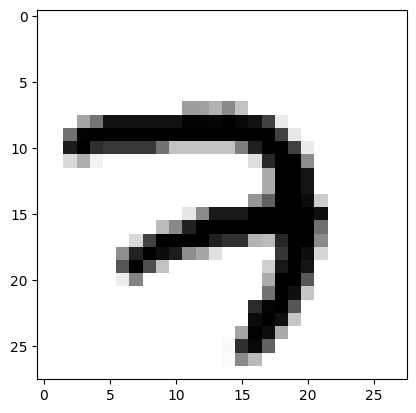

In [7]:
# Lets view some data
plt.imshow(X_train[0],cmap='binary')
plt.show()

<Axes: >

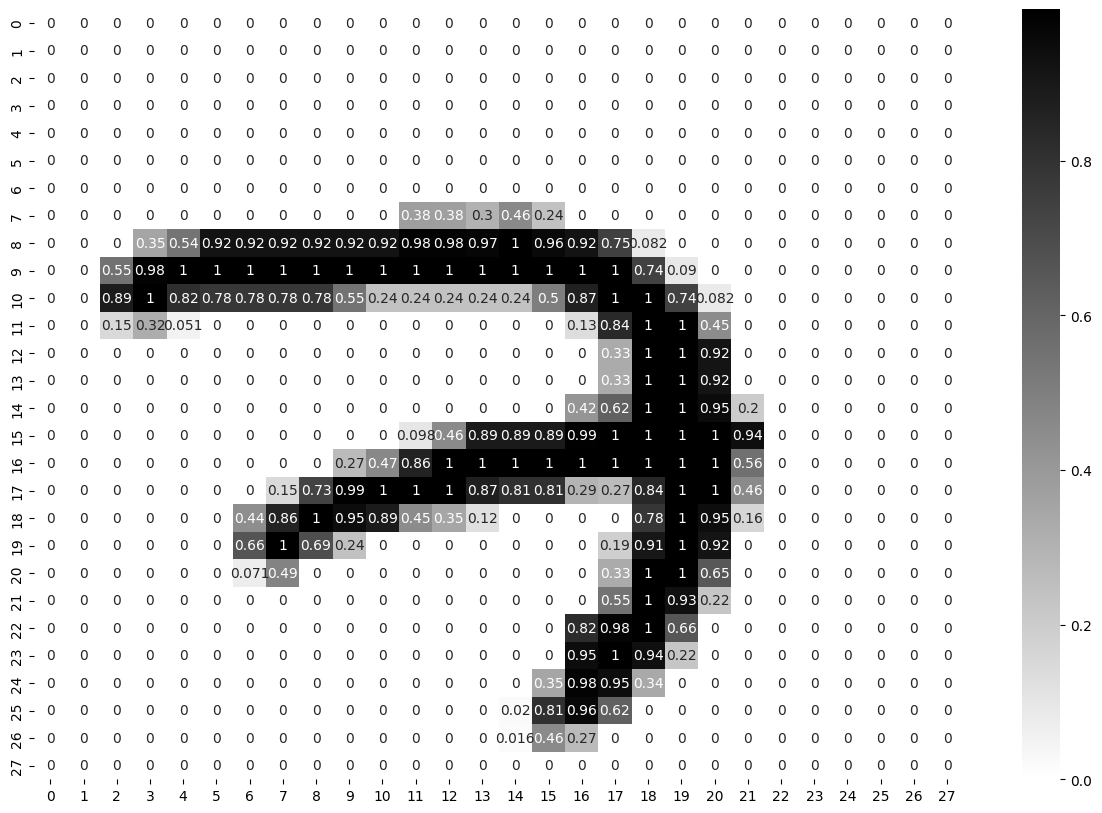

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train[0],annot=True,cmap='binary')

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

## Softmax
In simple words, the softmax activation function is used in machine learning and deep learning to turn a set of numbers into probabilities. It takes a bunch of numbers as input and transforms them in such a way that the largest number becomes close to 1, and the other numbers get smaller. This allows you to represent how likely each option is from a list of choices.
****************************************************************
## Relu
ReLU, which stands for Rectified Linear Unit, is a simple and popular activation function in neural networks. In short, it works like this:

If the input is positive, it keeps the input as it is.

If the input is negative, it turns it into zero.

So, ReLU is like a switch that turns off for negative numbers and lets positive numbers through. It's used to introduce non-linearity in the neural network and helps the network learn complex patterns and relationships in data.
************************************************************************
## Dense
In simple words, the Dense function in deep learning is like a versatile building block that allows a neural network to learn and represent patterns and relationships in data. It connects all the input elements to the output, applies non-linear transformations, and is commonly used for tasks like classification, regression, and feature learning.



In [9]:
# c. Define the network architecture using Keras
# Creating Layers of ANN

LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer1"),
        tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer2"),
        tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")]

model_clf=tf.keras.models.Sequential(LAYERS)

In [10]:
model_clf.layers

In [11]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [13]:
# d. Train the model using SGD
# SGD- It will move to each record(row) of the dataset calculate the loss function ,gradient and then it update the parameters of each row
# Loss function-Loss function is similar to cost dunction only the diffrence is it is calculated for single record..loss function is used to minimized the error and also to update the weights so the weights can reach to the global minima
LOSS_FUNCTION="sparse_categorical_crossentropy"#use=>tf.losses.sparse_categorical_crossentropy
OPTIMIZER="SGD"#or use with custom learning rate=>tf.keras.optimizers.SGD(0.02)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

In [14]:
# training
# If you set the number of epochs to 30 during the training of an Artificial Neural Network (ANN), it means that the network will go through your entire training dataset 30 times to learn from it and improve its predictions.
EPOCHS=30
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.6295 - accuracy: 0.8365 - val_loss: 0.3143 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2930 - accuracy: 0.9154 - val_loss: 0.2506 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2395 - accuracy: 0.9306 - val_loss: 0.2094 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2054 - accuracy: 0.9407 - val_loss: 0.1823 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1796 - accuracy: 0.9485 - val_loss: 0.1626 - val_accuracy: 0.9558
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1597 - accuracy: 0.9551 - val_loss: 0.1553 - val_accuracy: 0.9572
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1432 - accuracy: 0.9591 - val_loss: 0.1363 - val_accuracy

In [15]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

# The evaluation of the model on the dataset can be done using the evaluate() function. It takes two arguments i.e, input and output. It will generate a prediction for input

In [16]:
# e. Evaluate the network
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9791


[0.07028251141309738, 0.9790999889373779]

In [17]:
y_prob=model_clf.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[6.1755657e-07, 3.0821663e-08, 2.4204006e-05, ..., 9.9970788e-01,
        2.3252860e-06, 3.1189084e-06],
       [2.4971030e-06, 3.8975973e-05, 9.9959558e-01, ..., 1.3068530e-11,
        1.1712267e-05, 1.0894410e-11],
       [4.0739706e-06, 9.9763393e-01, 4.9320533e-04, ..., 7.4461143e-04,
        5.9424673e-04, 6.2729655e-06],
       ...,
       [6.8654116e-10, 1.6709477e-10, 5.7340888e-10, ..., 4.9208002e-06,
        4.0990517e-06, 3.6536348e-06],
       [2.0895680e-08, 2.4174345e-09, 4.3375435e-11, ..., 1.0733394e-10,
        1.8960696e-05, 3.6507758e-10],
       [2.8185752e-06, 1.9953483e-11, 1.2747009e-06, ..., 3.1658432e-12,
        3.3724469e-08, 5.0070956e-09]], dtype=float32)

<Axes: >

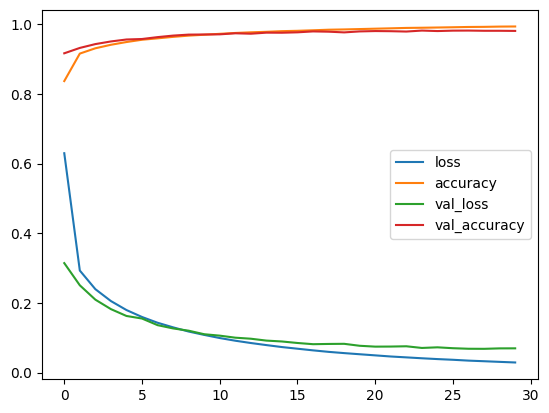

In [18]:
# f. Plot the training loss and accuracy
pd.DataFrame(history.history).plot()